Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

# Loading data

In [1]:
#define file paths.

import os

daisy_path = "flowers/daisy/"
dandelion_path = "flowers/dandelion/"
rose_path = "flowers/rose/"
sunflower_path = "flowers/sunflower/"
tulip_path = "flowers/tulip/"

Defining a function that will:

    1- Iterate through the data, append the images in one list and label all the images.
    2- Resize the images to 128 x 128.
    3- We will use openCV library for reading and resizing the images.

In [2]:
from os import listdir
import cv2



img_data = []
labels = []

size = 80, 80
def iter_images(images,directory,size,label):
    try:
        for i in range(len(images)):
            img = cv2.imread(directory + images[i], 0)
            img = cv2.resize(img,size)
            img_data.append(img)
            labels.append(label)
    except:
        pass

iter_images(listdir(daisy_path),daisy_path,size,0)
iter_images(listdir(dandelion_path),dandelion_path,size,1)
iter_images(listdir(rose_path),rose_path,size,2)
iter_images(listdir(sunflower_path),sunflower_path,size,3)
iter_images(listdir(tulip_path),tulip_path,size,4)

In [3]:
len(img_data),len(labels)

(4323, 4323)

In [4]:
labels[4000]

4

# Resizing an image in tensorflow

In [5]:
img_data[0].shape

(80, 80)

In [6]:
#Tensorflow expects a 3d image for operations so converting 2d image to 3d image

image1 = cv2.cvtColor(img_data[10],cv2.COLOR_GRAY2RGB)

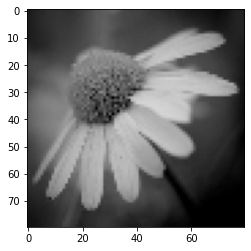

In [7]:
import matplotlib.pyplot as plt

plt.imshow(image1)
plt.show()

In [8]:
image1.shape

(80, 80, 3)

In [9]:
import tensorflow as tf

resized_image = tf.image.resize(image1, [60,60], method='nearest')

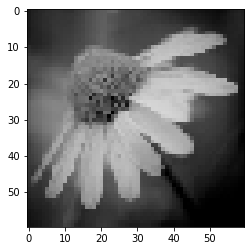

In [10]:
plt.imshow(resized_image)
plt.show()

In [11]:
resized_image.shape

TensorShape([60, 60, 3])

# converting data into numpy array

In [12]:
import numpy as np

data = np.asarray(img_data)

labels = np.asarray(labels)

In [13]:
data = data.reshape((4323, 80 * 80))
data = data.astype('float32') / 255

In [14]:
data

array([[0.54509807, 0.5764706 , 0.5882353 , ..., 0.5176471 , 0.5058824 ,
        0.49803922],
       [0.8627451 , 0.84705883, 0.85490197, ..., 0.49019608, 0.5803922 ,
        0.6784314 ],
       [0.47843137, 0.38431373, 0.3647059 , ..., 0.13725491, 0.14509805,
        0.14901961],
       ...,
       [0.2784314 , 0.2509804 , 0.28235295, ..., 0.3529412 , 0.34117648,
        0.28235295],
       [0.62352943, 0.8117647 , 0.67058825, ..., 0.07843138, 0.09411765,
        0.22745098],
       [0.19607843, 0.20784314, 0.3372549 , ..., 0.16470589, 0.30588236,
        0.13725491]], dtype=float32)

In [15]:
data.shape,labels.shape

((4323, 6400), (4323,))

# Splitting data

In [16]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.40, shuffle= True)

In [17]:
x_train.shape, y_train.shape

((2593, 6400), (2593,))

# Defining & Training Models

Trying different models with different number of layers and units

# Model-1

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128,activation='relu', input_shape=(80 * 80,)))

model.add(Dense(96,activation='relu'))

model.add(Dense(96,activation='relu'))

model.add(Dense(64,activation='relu'))


model.add(Dense(5,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
21/21 [==============================] - 1s 40ms/step - loss: 1.9832 - accuracy: 0.2484 - val_loss: 1.6465 - val_accuracy: 0.2260
Epoch 2/100
21/21 [==============================] - 1s 28ms/step - loss: 1.5816 - accuracy: 0.2765 - val_loss: 1.6027 - val_accuracy: 0.2653
Epoch 3/100
21/21 [==============================] - 1s 31ms/step - loss: 1.5733 - accuracy: 0.2730 - val_loss: 1.6093 - val_accuracy: 0.2399
Epoch 4/100
21/21 [==============================] - 1s 43ms/step - loss: 1.5853 - accuracy: 0.2626 - val_loss: 1.5683 - val_accuracy: 0.2925
Epoch 5/100
21/21 [==============================] - 1s 33ms/step - loss: 1.5582 - accuracy: 0.2885 - val_loss: 1.5444 - val_accuracy: 0.3116
Epoch 6/100
21/21 [==============================] - 1s 29ms/step - loss: 1.5419 - accuracy: 0.3031 - val_loss: 1.5433 - val_accuracy: 0.2711
Epoch 7/100
21/21 [==============================] - 1s 29ms/step - loss: 1.5514 - accuracy: 0.2885 - val_loss: 1.5546 - val_accuracy: 0.2890
Epoch 

Epoch 58/100
21/21 [==============================] - 0s 23ms/step - loss: 1.0392 - accuracy: 0.5858 - val_loss: 1.8327 - val_accuracy: 0.3110
Epoch 59/100
21/21 [==============================] - 0s 24ms/step - loss: 0.9656 - accuracy: 0.6128 - val_loss: 2.2048 - val_accuracy: 0.2988
Epoch 60/100
21/21 [==============================] - 0s 23ms/step - loss: 0.9657 - accuracy: 0.6294 - val_loss: 2.1289 - val_accuracy: 0.3012
Epoch 61/100
21/21 [==============================] - 1s 24ms/step - loss: 0.9649 - accuracy: 0.6209 - val_loss: 2.1970 - val_accuracy: 0.3075
Epoch 62/100
21/21 [==============================] - 1s 25ms/step - loss: 1.0049 - accuracy: 0.5997 - val_loss: 2.4692 - val_accuracy: 0.2879
Epoch 63/100
21/21 [==============================] - 0s 24ms/step - loss: 0.9497 - accuracy: 0.6248 - val_loss: 1.9915 - val_accuracy: 0.3087
Epoch 64/100
21/21 [==============================] - 1s 24ms/step - loss: 0.9219 - accuracy: 0.6440 - val_loss: 2.0631 - val_accuracy: 0.3040

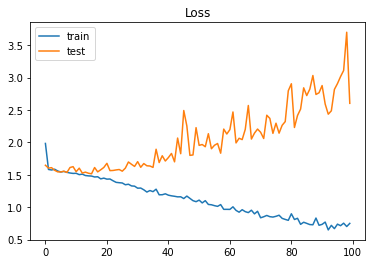

In [19]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

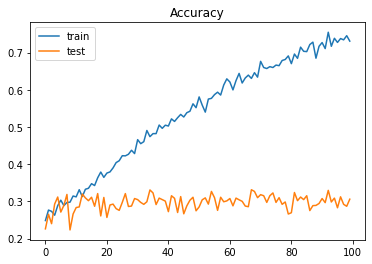

In [20]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Model-2

In [21]:
from keras import regularizers

model2 = Sequential()
model2.add(Dense(128,activation='relu', input_shape=(80 * 80,)))

model2.add(Dense(96, kernel_regularizer=regularizers.l2(0.001), activation='relu'))

model2.add(Dense(96, kernel_regularizer=regularizers.l2(0.001), activation='relu'))

model2.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))


model2.add(Dense(5,activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
21/21 [==============================] - 1s 52ms/step - loss: 2.3976 - accuracy: 0.2129 - val_loss: 1.9837 - val_accuracy: 0.2734
Epoch 2/100
21/21 [==============================] - 1s 29ms/step - loss: 1.9081 - accuracy: 0.2545 - val_loss: 1.8179 - val_accuracy: 0.2254
Epoch 3/100
21/21 [==============================] - 1s 28ms/step - loss: 1.8312 - accuracy: 0.2422 - val_loss: 1.9733 - val_accuracy: 0.2266
Epoch 4/100
21/21 [==============================] - 1s 28ms/step - loss: 1.7590 - accuracy: 0.2700 - val_loss: 1.7090 - val_accuracy: 0.2954
Epoch 5/100
21/21 [==============================] - 1s 28ms/step - loss: 1.7039 - accuracy: 0.2719 - val_loss: 1.7250 - val_accuracy: 0.2740
Epoch 6/100
21/21 [==============================] - 1s 29ms/step - loss: 1.6702 - accuracy: 0.2858 - val_loss: 1.6710 - val_accuracy: 0.3121
Epoch 7/100
21/21 [==============================] - 1s 30ms/step - loss: 1.6503 - accuracy: 0.3035 - val_loss: 1.6769 - val_accuracy: 0.2179
Epoch 

21/21 [==============================] - 1s 26ms/step - loss: 1.1356 - accuracy: 0.5804 - val_loss: 1.8428 - val_accuracy: 0.3139
Epoch 59/100
21/21 [==============================] - 1s 30ms/step - loss: 1.0631 - accuracy: 0.6020 - val_loss: 2.2543 - val_accuracy: 0.3179
Epoch 60/100
21/21 [==============================] - 1s 37ms/step - loss: 1.0694 - accuracy: 0.6032 - val_loss: 1.9914 - val_accuracy: 0.3017
Epoch 61/100
21/21 [==============================] - 1s 33ms/step - loss: 1.0431 - accuracy: 0.5978 - val_loss: 2.0554 - val_accuracy: 0.2861
Epoch 62/100
21/21 [==============================] - 1s 27ms/step - loss: 1.0564 - accuracy: 0.5962 - val_loss: 2.5690 - val_accuracy: 0.2728
Epoch 63/100
21/21 [==============================] - 1s 26ms/step - loss: 1.0858 - accuracy: 0.5935 - val_loss: 2.0874 - val_accuracy: 0.2884
Epoch 64/100
21/21 [==============================] - 1s 26ms/step - loss: 1.0331 - accuracy: 0.6055 - val_loss: 2.2591 - val_accuracy: 0.3046
Epoch 65/100

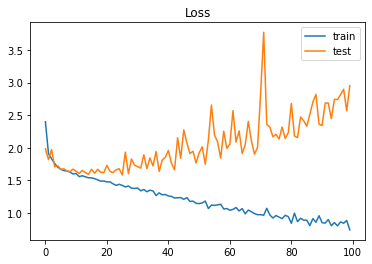

In [22]:
plt.title('Loss')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()

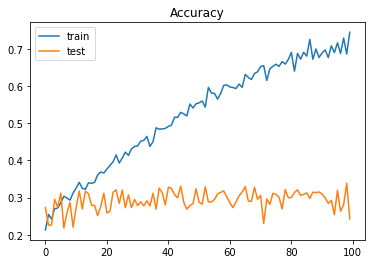

In [23]:
plt.title('Accuracy')
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Conclusion:

After trying different models with different sizes, number of units and using different techniques to prevent
overfitting, I concluded that its not possible to get more than 35% accuracy on test data when using DNN(Dense Neural Networks). 

This means that our model can achieve a better optimization but will not do well with generalization.

# Preferred Model:


The First model showed better results so we will use it for predictions

# Evaluation

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [25]:
print("Test Loss:", test_loss)
print("Test Accuracy:","%.2f" % round(test_accuracy * 100, 2), "%")

Test Loss: 2.602590799331665
Test Accuracy: 30.58 %


# Predictions

In [27]:
pred = model.predict_classes(x_test[:10])

for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

1 ==> 3
0 ==> 2
4 ==> 1
3 ==> 1
0 ==> 1
1 ==> 0
1 ==> 4
3 ==> 4
3 ==> 3
2 ==> 2
